---

# Principal Component Analysis (PCA)

## Introduction

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest. In data analysis, the first principal component of a set of *p* variables, presumed to be normally distributed, is the derived variable formed as a linear combination of the original variables that explains the most variance. The second principal component explains the most variance in what is left once the effect of the first component is removed, and we may proceed through *p* 
iterations until all the variance is explained.

PCA was invented in 1901 by Karl Pearson, as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by Harold Hotelling in the 1930s.

Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features. High-dimensional data are very common in biology and arise when multiple features, such as expression of many genes, are measured for each sample.

## Algorithm

PCA reduces data by geometrically projecting them onto lower dimensions called principal components (PCs), with the goal of finding the best summary of the data using a limited number of PCs. The first PC is chosen to minimize the total distance between the data and their projection onto the PC. By minimizing this distance, we also maximize the variance of the projected points, σ^2. The second (and subsequent) PCs are selected similarly, with the additional requirement that they be uncorrelated with all previous PCs.

PCA is defined as an orthogonal transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

Consider an $n \times p$ data matrix $X$, with column-wise zero , where each of the rows represents a different repetition of the experiment, and each of the columns gives a particular kind of feature .

The $k$-th component can be found by subtracting the first $k$ principal components from $X$:

$$\mathbf{\hat{X}}_k = \mathbf{X} - \sum_{s = 1}^{k - 1} \mathbf{X} \mathbf{w}_{(s)} \mathbf{w}_{(s)}^{\mathsf{T}}$$

and then finding the weight vector which extracts the maximum variance from this new data matrix
$$\mathbf{w}_{(k)}
= \mathop{\operatorname{arg\,max}}_{\left\| \mathbf{w} \right\| = 1} \left\{ \left\| \mathbf{\hat{X}}_{k} \mathbf{w} \right\|^2 \right\}
= \arg\max \left\{ \tfrac{\mathbf{w}^\mathsf{T} \mathbf{\hat{X}}_{k}^\mathsf{T} \mathbf{\hat{X}}_{k} \mathbf{w}}{\mathbf{w}^T \mathbf{w}} \right\}$$

And the full principal components decomposition of $X$ is given by
$$
\mathbf{T} = \mathbf{X}\mathbf{W}
$$
where $W$ is a p-by-p matrix of weights

---

## Dataset
We will use the *penguins* dataset loaded from *seaborn* to demonstrate this new technique. 
The Introduction of *penguins* dataset is described in README.md

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

penguins = sns.load_dataset("penguins").dropna()
X = penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].to_numpy()
y = penguins.species.to_numpy()

In [7]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


---

1. **Stadardize (center and scale) the data.** 

2. **Compute the covariance or correlation matrix**:

$$
S = \frac{1}{n-1}AA^T
$$

3. **Find the eigenvalues and the orthonormal eigenvectors of $S$.** 

$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$

---

In [8]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [9]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



---

4. **Find the principal components.**

5. **Reduce the dimension of the data.**

---


To project the data contained in $A$ onto the first two principle component axis, we compute $A [PC_1 PC_2]$.




---

In [10]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

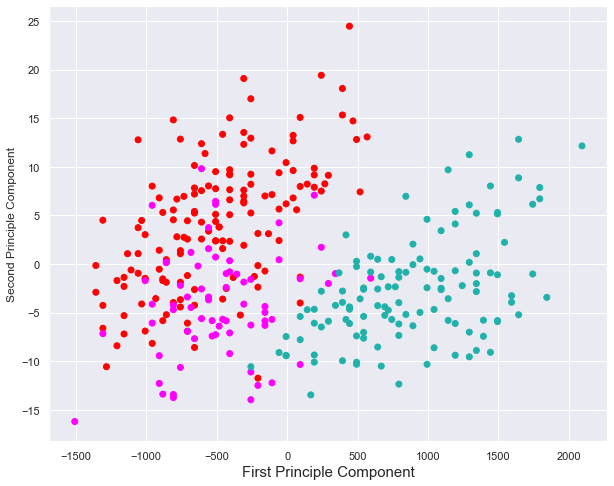

In [11]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()


In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



---
We can see that about 88% of variance comes from the first two components.

---

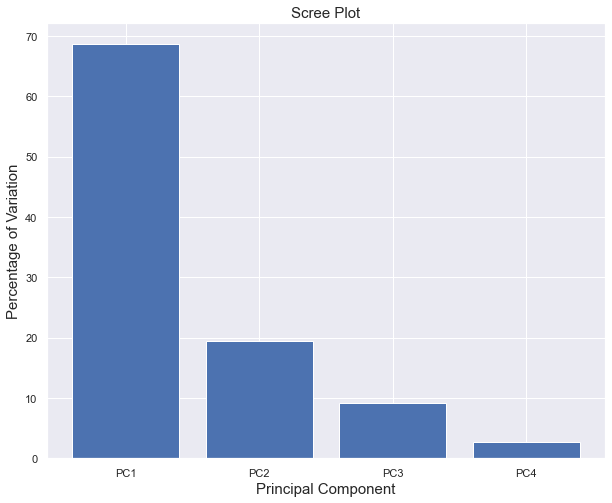

In [13]:
# Create a "Scree Plot" for the above array

labels = [f"PC{i}" for i in range(1,5)]
plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [14]:
# we call function pca.components_ to see how each PC is obtained as a linear combination of the original coordinates

# here PC1 = 0.454 * bill_depth_mm + 0.600 * bill_length_mm + 0.642 * flipper_length_mm + 0.145 * body_mass_g

features = list(set(penguins.columns) - {"species"}-{"island"}-{"sex"})
pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
bill_depth_mm,0.453753,-0.399047,0.576825,0.549675
body_mass_g,0.600195,0.796170,0.005788,0.076464
flipper_length_mm,0.642495,-0.425800,-0.236095,-0.591737
bill_length_mm,0.145170,-0.159904,-0.781984,0.584686


In [15]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


In [16]:
# we add to the previous table the labels for each penguin species

projected_df = pd.concat([pca_df, penguins.species], axis = 1)
projected_df =projected_df[:333]#we have a few more rows with NaN values, drop these rows
projected_df

,PC1,PC2,PC3,PC4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo
330,2.751505,0.266556,-0.419306,0.236256,Gentoo
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo


In [17]:
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4,species,color
0,-1.853593,0.032069,-0.234902,0.528397,Adelie,red
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie,red
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie,red
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN,red
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie,red
...,...,...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892,Gentoo,lightseagreen
329,1.832651,-0.784510,0.240758,-0.008955,Gentoo,lightseagreen
330,2.751505,0.266556,-0.419306,0.236256,Gentoo,lightseagreen
331,1.713854,-0.725875,-0.262764,0.330004,Gentoo,lightseagreen


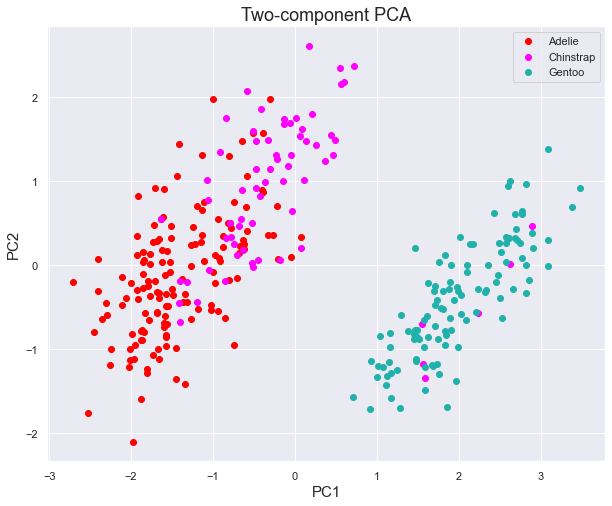

In [18]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

## Reference

Lever, J., Krzywinski, M., &amp; Altman, N. (2017, June 29). Principal component analysis. Nature News. Retrieved May 5, 2022, from https://www.nature.com/articles/nmeth.4346 

Wikimedia Foundation. (2022, May 5). Principal component analysis. Wikipedia. Retrieved May 5, 2022, from https://en.wikipedia.org/wiki/Principal_component_analysis 